In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px


In [2]:
medical_df=pd.read_csv('..\Data Files\medical-charges.csv')

In [3]:
non_smoker_df=medical_df[medical_df.smoker=='no']

In [4]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

In [5]:
inputs.shape

(1064, 1)

In [11]:
targets.shape

(1064,)

In [33]:
model=LinearRegression

In [34]:
inputs, targets=non_smoker_df[['age']],non_smoker_df.charges

In [35]:
model=LinearRegression().fit(inputs,targets)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [22]:
predictions=model.predict(inputs)

In [23]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [24]:
inputs,targets=non_smoker_df[['age','bmi']],non_smoker_df.charges

In [27]:
model=LinearRegression().fit(inputs,targets)
print(model)

LinearRegression()


In [28]:
predictions=model.predict(inputs)

In [29]:
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [50]:
def rsme(x1,x):
    loss=np.sqrt(np.mean(np.square(x1-x)))
    print('Loss:', loss)


In [38]:
rsme(x1=targets, x=predictions)

Loss: 4662.312835461298


In [41]:
# Visualize the relationship between the 3 variables
fig=px.scatter_3d(non_smoker_df,x='age',y='bmi',z='charges')
fig.update_traces(marker_size=5)
fig.show()

In [42]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.138928704535422

In [45]:
fig=px.strip(non_smoker_df,x='children',y='charges')
fig.update_traces(marker_size=4,marker_opacity=0.7)
fig.show()

In [46]:
inputs,targets=non_smoker_df[['age','bmi','children']],non_smoker_df.charges
model=LinearRegression().fit(inputs,targets)


In [47]:
model.coef_

array([265.2938443 ,   5.27956313, 580.65965053])

In [48]:
model.intercept_

-2809.2976032235874

In [54]:
predictions=model.predict(inputs)

In [58]:
import seaborn as sns

<AxesSubplot:xlabel='smoker', ylabel='charges'>

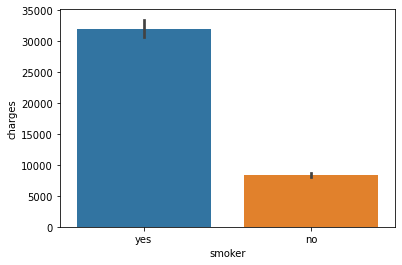

In [59]:
#For categorical inputs
sns.barplot(data=medical_df,x='smoker',y='charges')


In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
smoker_code={'yes':1,'no':0}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)

In [12]:
sex_code={'male':0,'female':1}
medical_df['sex_code']=medical_df.sex.map(sex_code)

In [25]:

from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_



[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
one_hot=enc.transform(medical_df[['region']]).toarray()


In [17]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [27]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,NaN,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,0,southeast,1725.55230,NaN,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,0,southeast,4449.46200,NaN,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,0,northwest,21984.47061,NaN,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,0,northwest,3866.85520,NaN,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,NaN,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,0,northeast,2205.98080,NaN,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,0,southeast,1629.83350,NaN,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,0,southwest,2007.94500,NaN,1,0.0,0.0,0.0,1.0


In [29]:
inputs_cols=['age','bmi','children','smoker','sex_code','northeast', 'northwest', 'southeast', 'southwest']

In [43]:
inputs,targets=medical_df[inputs_cols], medical_df['charges']

In [44]:
LinearRegression().fit(inputs,targets)

LinearRegression()

In [45]:
model=LinearRegression

In [46]:
predictions=model.predict(inputs)

TypeError: predict() missing 1 required positional argument: 'X'

In [48]:
medical_df[inputs_cols].loc[10]

age          25.00
bmi          26.22
children      0.00
smoker        0.00
sex_code      0.00
northeast     1.00
northwest     0.00
southeast     0.00
southwest     0.00
Name: 10, dtype: float64

In [49]:
model.coef_

AttributeError: type object 'LinearRegression' has no attribute 'coef_'

In [50]:
model._set_intercept

<function sklearn.linear_model._base.LinearModel._set_intercept(self, X_offset, y_offset, X_scale)>

In [51]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

NameError: name 'input_cols' is not defined

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [55]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [56]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [57]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [60]:
cat_cols = ['smoker', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [61]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

In [62]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
predictions_train = model.predict(inputs_train)
